## Exercise 2:

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
# Define x and y:
n = 100

x = np.random.rand(n,1)
y = 2.0+5*x*x+0.1*np.random.randn(n,1)

1. Make model manually:
- Set up $X$ (model dependence)
- Calculate $\hat\beta$
- Set up $\tilde y = X \hat \beta$
- Compute $MSE$ with $\hat\beta$

In [3]:
X = np.array([[1, x_, x_**2] for x_ in x[:,0]])

opt_beta = np.linalg.inv(X.T @ X) @ X.T @ y

opt_beta

array([[1.99345403],
       [0.07158952],
       [4.88969369]])

In [4]:
y_tilde = X @ opt_beta

mse = (1/n) * ((y - y_tilde).T @ (y - y_tilde))[0,0]

print(f"MSE = {mse}")

MSE = 0.00970625586177979


2. Using scikit-learn:

In [5]:
poly2 = PolynomialFeatures(degree=2)
X = poly2.fit_transform(x)

clf2 = LinearRegression(fit_intercept= False)
clf2.fit(X,y)

clf2.coef_

array([[1.99345403, 0.07158952, 4.88969369]])

In [6]:
y_pred = clf2.predict(X)

mse = mean_squared_error(y, y_pred)

print(f"MSE = {mse}")

MSE = 0.0097062558617798


In [7]:
variance_score = r2_score(y, y_pred)

print(f"Variance score = {variance_score}")

Variance score = 0.9949204870412713


We achieve low MSE values and a Variance score close to 1, which tells us that the model is well fit to the data. As the data contains some stochastic noise, we cannot expect a perfect fit (i.e. MSE = 0, R2 = 1), however we are quite close.

Increasing/decreasing the coefficient in front of the stochastic noise term does not change the $\hat \beta$ (model coefficients) substantially, however increasing it increases the MSE and reduces the variance score, and accordingly decreasing it decreases the MSE and increases the variance score. If we make it really low, we see that our coefficients are slightly closer matching the theoretical solution perfectly. (i.e. [2, 0, 5]).

This is expected as the noise makes it harder for the model to recognize the actual pattern, as well as making it impossible for a polynomial of second order to perfectly fit to the data.

## Exercise 3:

In [27]:
np.random.seed()
n = 500
# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

##### 3a)

In [9]:
X = np.ones((n, 6))
X[:,1] = x[:,0]
X[:,2] = x[:,0]**2
X[:,3] = x[:,0]**3
X[:,4] = x[:,0]**4
X[:,5] = x[:,0]**5

In [10]:
test_size=0.2
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=test_size)

##### 3b)

In [11]:
opt_beta = np.linalg.inv(train_X.T @ train_X) @ train_X.T @ train_y

train_y_tilde = train_X @ opt_beta
mse_train = (1/(n*(1-test_size))) * ((train_y - train_y_tilde).T @ (train_y - train_y_tilde))[0,0]

test_y_tilde = test_X @ opt_beta
mse_test = (1/(n*test_size)) * ((test_y - test_y_tilde).T @ (test_y - test_y_tilde))[0,0]

print(f"Coefficients = {opt_beta[:,0]}")
print(f"Train MSE = {mse_train}")
print(f"Test MSE  = {mse_test}")

Coefficients = [ 0.82283309  0.30314406 -0.02018724  0.04638296 -0.00371593 -0.00847238]
Train MSE = 0.023288160202338225
Test MSE  = 0.027103768016929843


#### 3c)

In [12]:
def trainTestMSE(x: np.ndarray, y: np.ndarray, degree: int, test_size: float = 0.2):
    n = len(x)

    # Create X
    X = np.ones((n, degree+1))
    for i in range(1, degree+1):
        X[:,i] = x[:,0]**i

    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=test_size)

    opt_beta = np.linalg.inv(train_X.T @ train_X) @ train_X.T @ train_y

    train_y_tilde = train_X @ opt_beta
    mse_train = (1/(n*(1-test_size))) * ((train_y - train_y_tilde).T @ (train_y - train_y_tilde))[0,0]

    test_y_tilde = test_X @ opt_beta
    mse_test = (1/(n*test_size)) * ((test_y - test_y_tilde).T @ (test_y - test_y_tilde))[0,0]

    return mse_train, mse_test

Text(0.5, 1.0, 'MSE for OLS-fitted model with $n=3000$, $\\text{test_size}=0.2$')

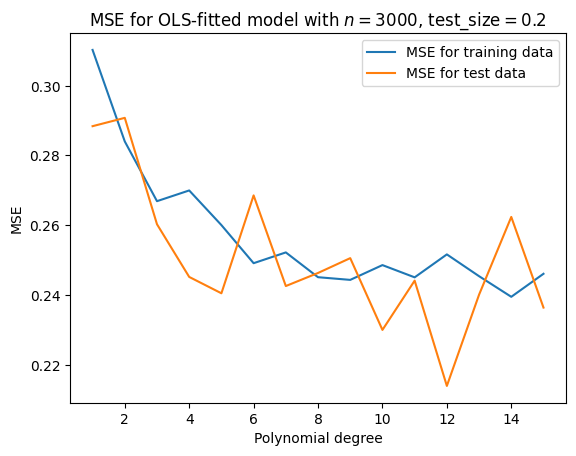

In [28]:
max_deg = 15

mse_train_list = []
mse_test_list = []
degs = list(range(1, max_deg+1))

for deg in degs:
    mse_train, mse_test = trainTestMSE(x, y, deg)
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)

plt.plot(degs, mse_train_list, label='MSE for training data')
plt.plot(degs, mse_test_list, label='MSE for test data')
plt.legend()
plt.xlabel('Polynomial degree')
plt.ylabel('MSE')
plt.title(rf'MSE for OLS-fitted model with $n={n}$, $\text{{test_size}}={test_size}$')

In contrast to what is described in Figure 2.11 of Hastie et al, we do not observe a substantial increase in MSE for test data as we increase the polynomial degree.
